# Real Estate

**`Problem Statement`**
1.   A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
2.   The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate
1.   A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
2.   The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.





# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

#Project Task: Week 1

##Data Import and Preparation:

**`Data Import and Preparation`**
1. Import data.
2. Figure out the primary key and look for the requirement of indexing.
3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

**`Exploratory Data Analysis (EDA)`**
4. Perform debt analysis. You may take the following steps:
   1. Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

  2. Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 
  
  3. Create pie charts to show overall debt and bad debt

  4. Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

  5. Create a collated income distribution chart for family income, house hold income, and remaining income

### Importing Dataset

**`Dataset Description`**

Following are the themes the fields fall under Home Owner Costs: Sum of utilities, property taxes.

1. Second Mortgage: Households with a second mortgage statistics.

2. Home Equity Loan: Households with a Home equity Loan statistics.

3.	Debt: Households with any type of debt statistics.

4.	Mortgage Costs: Statistics regarding mortgage payments, home equity loans, utilities and property taxes

5.	Home Owner Costs: Sum of utilities, property taxes statistics

6.	Gross Rent: Contract rent plus the estimated average monthly cost of utility features

7.	Gross Rent as Percent of Income Gross rent as the percent of income very interesting

8.	High school Graduation: High school graduation statistics.

9.	Population Demographics: Population demographic statistics.

10. Age Demographics: Age demographic statistics.

11. Household Income: Total income of people residing in the household.

12. Family Income: Total income of people related to the householder.

In [64]:
train_DF=pd.read_csv("train.csv")
test_DF=pd.read_csv("test.csv")

### Properties Of Dataset

In [65]:
train_DF.shape

(27321, 80)

In [66]:
train_DF.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [67]:
train_DF.info()
#float64(68), int64(6), object(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [68]:
#Null Count
null_count = pd.DataFrame(data = train_DF.isna().sum()).reset_index()
null_count.columns = ['Columns', 'Count']
null_count

,Columns,Count
0,UID,0
1,BLOCKID,27321
2,SUMLEVEL,0
3,COUNTYID,0
4,STATEID,0
5,state,0
6,state_ab,0
7,city,0
8,place,0
9,type,0


In [69]:
train_DF.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,27321.000000,27321.000000,27321.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27007.000000,27321.000000,27321.000000,27053.000000,27053.000000,27053.000000,27053.000000,27053.000000,27023.000000,27023.000000,27023.000000,27023.000000,27023.000000,26748.000000,26748.000000,26748.000000,26748.000000,26748.000000,26721.000000,26721.000000,26721.000000,26721.000000,26721.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,26864.000000,27131.000000,27121.000000,27098.000000,27132.000000,27132.000000,27132.000000,27132.000000,27132.000000,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,6.521754e+06,4316.032685,2123.924820,2192.107866,1055.129032,1007.672789,394.256202,295.979447,548.005702,0.957824,0.867134,0.739429,0.612959,0.499994,0.411007,0.345424,0.254469,574.269390,528.533546,70441.191421,57580.508964,54429.005158,923.580372,1607.974384,78987.539104,69279.801465,50728.337493,533.686966,1063.665988,1629.856392,1551.455735,622.559191,287.552519,669.827389,540.549473,513.383968,218.604647,370.284570,254.722233,0.025695,0.029947,0.100847,0.629190,0.467957,0.477485,0.499458,0.858459,0.852136,0.864931,38.339988,38.074193,21.500301,535.457318,2138.719962,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,2.186781e+08,2169.226173,1114.948893,1101.895160,437.430562,443.797814,187.190303,272.203470,461.547524,0.063186,0.109655,0.143799,0.160305,0.164006,0.160201,0.153217,0.137742,466.009996,450.622720,30166.895308,29128.465950,17619.932892,453.057675,751.096015,31386.178602,33472.030541,14239.749880,290.603105,560.873112,623.206122,652.619435,238.068593,195.340264,464.411215,221.339933,231.392365,91.456509,250.727935,189.912748,0.031331,0.034134,0.069304,0.156267,0.294956,0.256125,0.264138,0.112420,0.120746,0.112273,5.602570,7.874651,2.540576,312.922652,1104.593574,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,0.000000,0.000000,0.000000,117.150000,104.000000,18.257420,0.343000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4999.846690,4790.000000,1825.741860,0.114260,3.000000,5374.842520,5278.000000,1825.741860,0.199960,3.000000,234.650000,237.000000,36.514840,0.198400,1.000000,53.594610,53.000000,18.257420,2.000000,0.614040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [70]:
train_DF.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.7496

### Figure out the primary key and look for the requirement of indexing.

In [71]:
#len(train_DF['UID'].unique())

In [72]:
#UID is unique userID value in the train and test dataset. So an index can be created from the UID feature
train_DF.set_index(keys=['UID'],inplace=True)#Set the DataFrame index using existing columns.
test_DF.set_index(keys=['UID'],inplace=True)

### Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [73]:
#percantage of missing values in train set
missing_list_train=train_DF.isnull().sum() *100/len(train_DF)
missing_values_train_DF=pd.DataFrame(missing_list_train,columns=['Percantage of missing values'])
missing_values_train_DF.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
missing_values_train_DF[missing_values_train_DF['Percantage of missing values'] >0][:10]

,Percantage of missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
hc_sample_weight,2.196113
hc_mortgage_mean,2.097288
hc_mortgage_stdev,2.097288
hc_mortgage_sample_weight,2.097288
hc_mortgage_samples,2.097288


In [74]:
#percantage of missing values in test set
missing_list_test=test_DF.isnull().sum() *100/len(train_DF)
missing_values_test_DF=pd.DataFrame(missing_list_test,columns=['Percantage of missing values'])
missing_values_test_DF.sort_values(by=['Percantage of missing values'],inplace=True,ascending=False)
missing_values_test_DF[missing_values_test_DF['Percantage of missing values'] >0][:10]

,Percantage of missing values
BLOCKID,42.857143
hc_samples,1.061455
hc_mean,1.061455
hc_median,1.061455
hc_stdev,1.061455
hc_sample_weight,1.061455
hc_mortgage_mean,0.980930
hc_mortgage_stdev,0.980930
hc_mortgage_sample_weight,0.980930
hc_mortgage_samples,0.980930


In [75]:
train_Variance = pd.DataFrame(train_DF.var(),columns=['Variance'])
train_Variance_sort = train_Variance.sort_values(by=['Variance'],ascending=True)
train_Variance_sort

,Variance
SUMLEVEL,0.000000e+00
separated,4.324823e-04
home_equity_second_mortgage,9.816144e-04
second_mortgage,1.165163e-03
married_snp,1.416734e-03
divorced,2.406412e-03
rent_gt_10,3.992479e-03
home_equity,4.803112e-03
rent_gt_15,1.202414e-02
hs_degree_female,1.260518e-02


In [76]:
test_Variance = pd.DataFrame(test_DF.var(),columns=['Variance'])
test_Variance_sort = test_Variance.sort_values(by=['Variance'],ascending=True)
test_Variance_sort

,Variance
SUMLEVEL,0.000000e+00
separated,4.591488e-04
home_equity_second_mortgage,9.310234e-04
second_mortgage,1.131915e-03
married_snp,1.497178e-03
divorced,2.354662e-03
rent_gt_10,4.045380e-03
home_equity,4.957866e-03
rent_gt_15,1.161853e-02
hs_degree_female,1.281528e-02


In [77]:
train_DF.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power and no variance

In [78]:
test_DF.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power

In [79]:
# Imputing  missing values with mean
missing_train_cols=[]
for col in train_DF.columns:
    if train_DF[col].isna().sum() !=0:
         missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [80]:
# Missing cols are all numerical variables
for col in train_DF.columns:
    if col in (missing_train_cols):
        train_DF[col].replace(np.nan, train_DF[col].mean(),inplace=True)

In [81]:
# Imputing  missing values with mean
missing_test_cols=[]
for col in test_DF.columns:
    if test_DF[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [82]:
# Missing cols are all numerical variables
for col in test_DF.columns:
    if col in (missing_test_cols):
        test_DF[col].replace(np.nan, test_DF[col].mean(),inplace=True)

In [83]:
train_DF.isna().sum().sum()

0

In [84]:
test_DF.isna().sum().sum()

0

##Exploratory Data Analysis (EDA):
4.Perform debt analysis. You may take the following steps:

### 1.Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [85]:
!pip install pandasql
from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from train_DF where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())#The main function used in pandasql is sqldf. sqldf accepts 2 parametrs 
                                        #1. a sql query string = q1
                                        #2. an set of session/environment variables (locals() or globals())
train_DF_location_mort_pct=pysqldf(q1)

In [86]:
train_DF_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [87]:
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [88]:
fig = go.Figure(data=go.Scattergeo(
    lat = train_DF_location_mort_pct['lat'],
    lon = train_DF_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

###2.Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [89]:
train_DF['bad_debt']=train_DF['second_mortgage']+train_DF['home_equity']-train_DF['home_equity_second_mortgage']

### 3.Create pie charts to show overall debt and bad debt

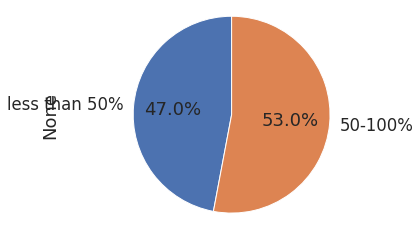

In [90]:
train_DF['bins'] = pd.cut(train_DF['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
train_DF.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()
#df.plot.pie(subplots=True,figsize=(8, 3))

###4.Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [91]:
cols=[]
train_DF.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [92]:
#Taking Hamilton and Manhattan cities data
cols=['second_mortgage','home_equity','debt','bad_debt']
df_box_hamilton=train_DF.loc[train_DF['city'] == 'Hamilton']
df_box_manhattan=train_DF.loc[train_DF['city'] == 'Manhattan']
df_box_city=pd.concat([df_box_hamilton,df_box_manhattan])
df_box_city.head(4)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 50%
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,40.206266,-74.675274,4623635.0,75545,5050,1926,3124,1299.55492,1106.0,476.90596,273.50240,982.0,1.00000,0.84746,0.68114,0.60169,0.36335,0.25530,0.23835,0.17055,1000,944,80521.77955,61619.0,64319.32971,1476.17237,2721.0,117179.87740,105448.0,62810.85492,353.10227,1144.0,1865.82107,1672.0,874.41806,431.82729,1283.0,774.11639,780.0,183.95710,438.0,224.36364,0.01859,0.03021,0.16909,0.74550,0.34594,0.18660,0.26368,0.94187,0.96176,0.93029,44.17886,43.75000,21.65283,446.96441,1926.0,52.81825,55.00000,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,50-100%
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,39.364028,-84.570717,3598447.0,112290,4615,2087,2528,687.22347,719.0,277.66094,534.12791,687.0,0.98399,0.88501,0.77001,0.62591,0.51092,0.42504,0.33770,0.22853,693,687,53074.46754,39319.0,48747.89548,1202.21734,1726.0,59345.58535,43927.0,48015.86057,744.58085,1088.0,1011.30380,995.0,246.23596,514.75102,729.0,320.70619,318.0,101.22659,304.0,270.16162,0.04743,0.04743,0.15005,0.70571,0.21952,0.24346,0.35449,0.83930,0.85614,0.82438,35.35287,35.83333,19.97726,502.14915,2087.0,35.13247,31.66667,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,50-100%
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,33.759514,-88.377770,235934245.0,710507,3783,1829,1954,659.65320,755.0,161.98765,137.40404,147.0,0.92174,0.84348,0.69565,0.20870,0.20870,0.20870,0.20870,0.13913,221,115,56218.87091,47965.0,51357.62464,810.61414,1301.0,64115.06976,55171.0,48135.02541,585.00426,1019.0,1151.71231,1011.0,469.03313,280.60828,409.0,386.92921,329.0,186.69331,671.0,536.61202,0.00000,0.00000,0.02130,0.37870,1.00000,0.79686,0.90663,0.82507,0.79527,0.85023,35.35016,33.25000,22.58558,444.45947,1829.0,37.53793,35.91667,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 50%


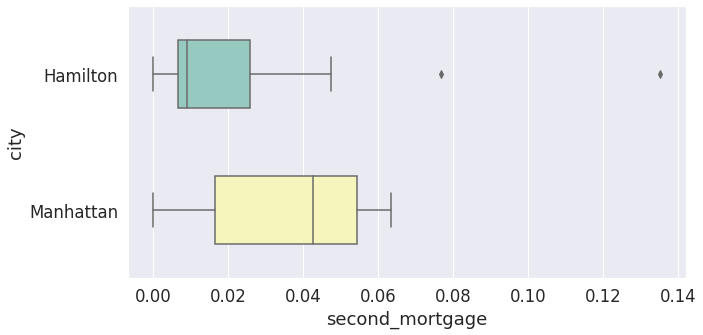

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()

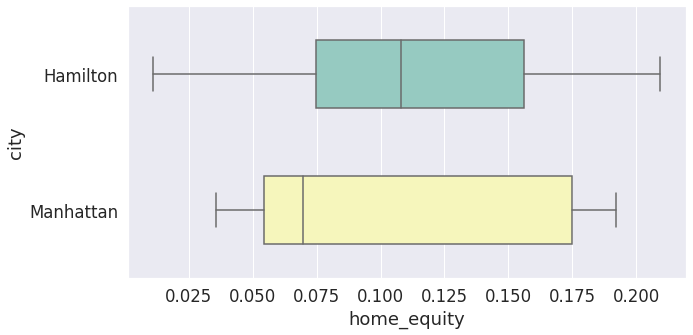

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()

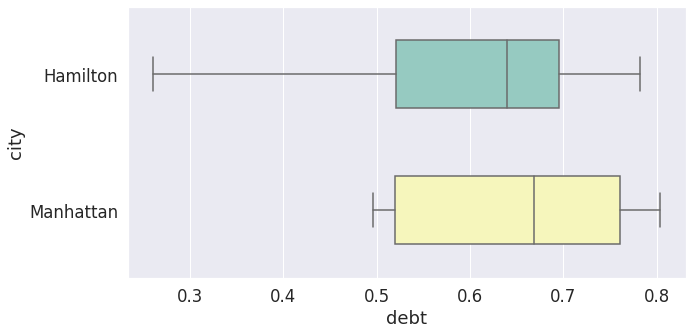

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

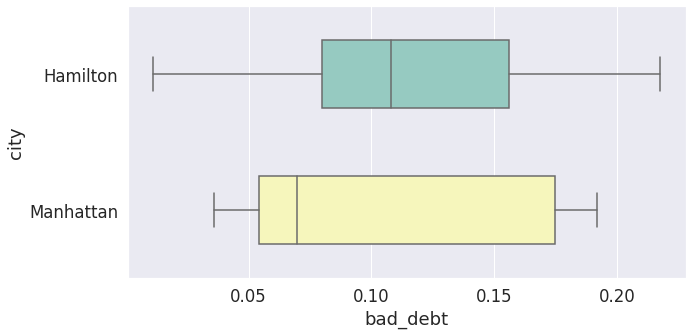

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

###5.Create a collated income distribution chart for family income, house hold income, and remaining income

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



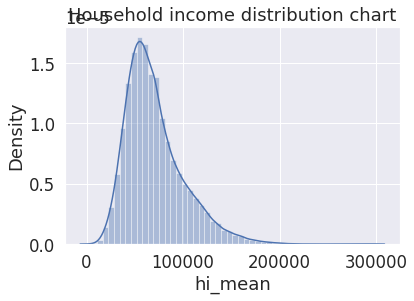

In [97]:
sns.distplot(train_DF['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



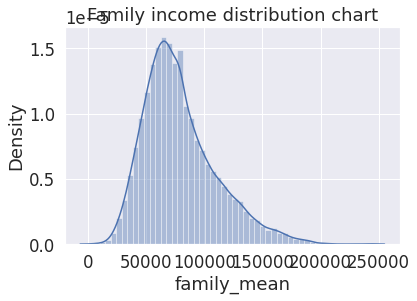

In [98]:
sns.distplot(train_DF['family_mean'])
plt.title('Family income distribution chart')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



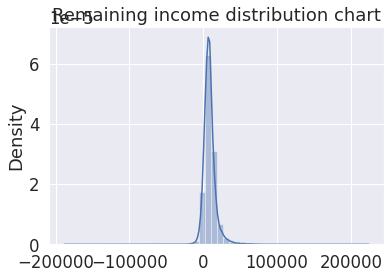

In [99]:
sns.distplot(train_DF['family_mean']-train_DF['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

#Project Task: Week 2

##Exploratory Data Analysis (EDA):

###1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



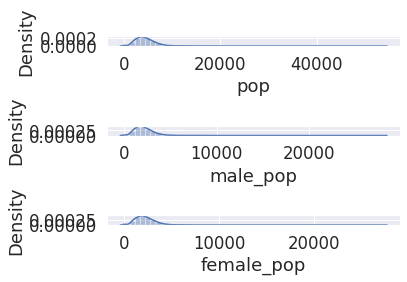

In [100]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(train_DF['pop'],ax=ax1)
sns.distplot(train_DF['male_pop'],ax=ax2)
sns.distplot(train_DF['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



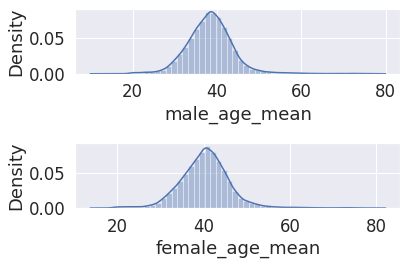

In [101]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(train_DF['male_age_mean'],ax=ax1)
sns.distplot(train_DF['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

a) Use pop and ALand variables to create a new field called population density

In [102]:
train_DF['pop_density']=train_DF['pop']/train_DF['ALand']

In [103]:
test_DF['pop_density']=test_DF['pop']/test_DF['ALand']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



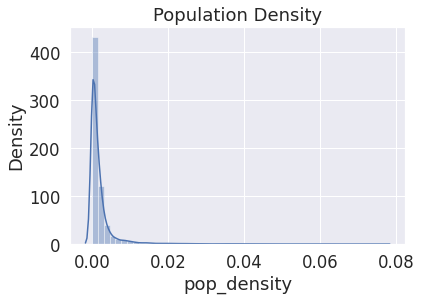

In [104]:
sns.distplot(train_DF['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [105]:
train_DF['age_median']=(train_DF['male_age_median']+train_DF['female_age_median'])/2
test_DF['age_median']=(test_DF['male_age_median']+test_DF['female_age_median'])/2

In [106]:
train_DF[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


c) Visualize the findings using appropriate chart type

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



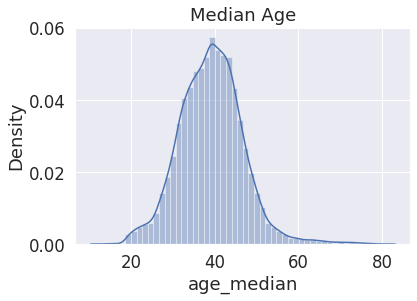

In [107]:
sns.distplot(train_DF['age_median'])
plt.title('Median Age')
plt.show()
# Age of population is mostly between 20 and 60
# Majority are of age around 40
# Median age distribution has a gaussian distribution
# Some right skewness is noticed

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



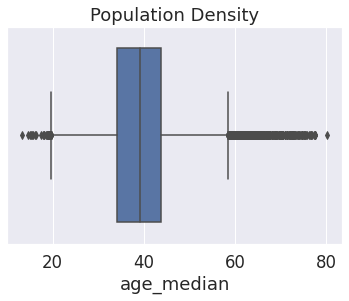

In [108]:
sns.boxplot(train_DF['age_median'])
plt.title('Population Density')
plt.show() 

###2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [109]:
train_DF['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [110]:
train_DF['pop_bins']=pd.cut(train_DF['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [111]:
train_DF[['pop','pop_bins']]

,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low
...,...,...
279212,1847,very low
277856,4155,very low
233000,2829,very low


In [112]:
train_DF['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

a) Analyze the married, separated, and divorced population for these population brackets

In [113]:
train_DF.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [114]:
train_DF.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

b) Visualize using appropriate chart type

<Figure size 720x360 with 0 Axes>

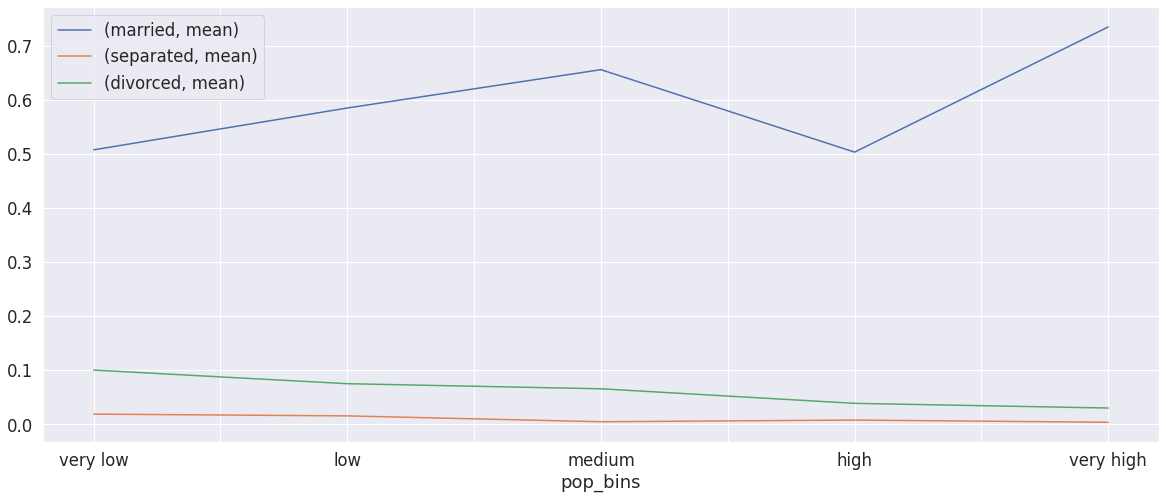

In [115]:
plt.figure(figsize=(10,5))
pop_bin_married=train_DF.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

###3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [116]:
rent_state_mean=train_DF.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [117]:
income_state_mean=train_DF.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [118]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [119]:
#overall level rent as a percentage of income
sum(train_DF['rent_mean'])/sum(train_DF['family_mean'])

0.013358170721473864

###4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [120]:
train_DF.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [121]:
cor=train_DF[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

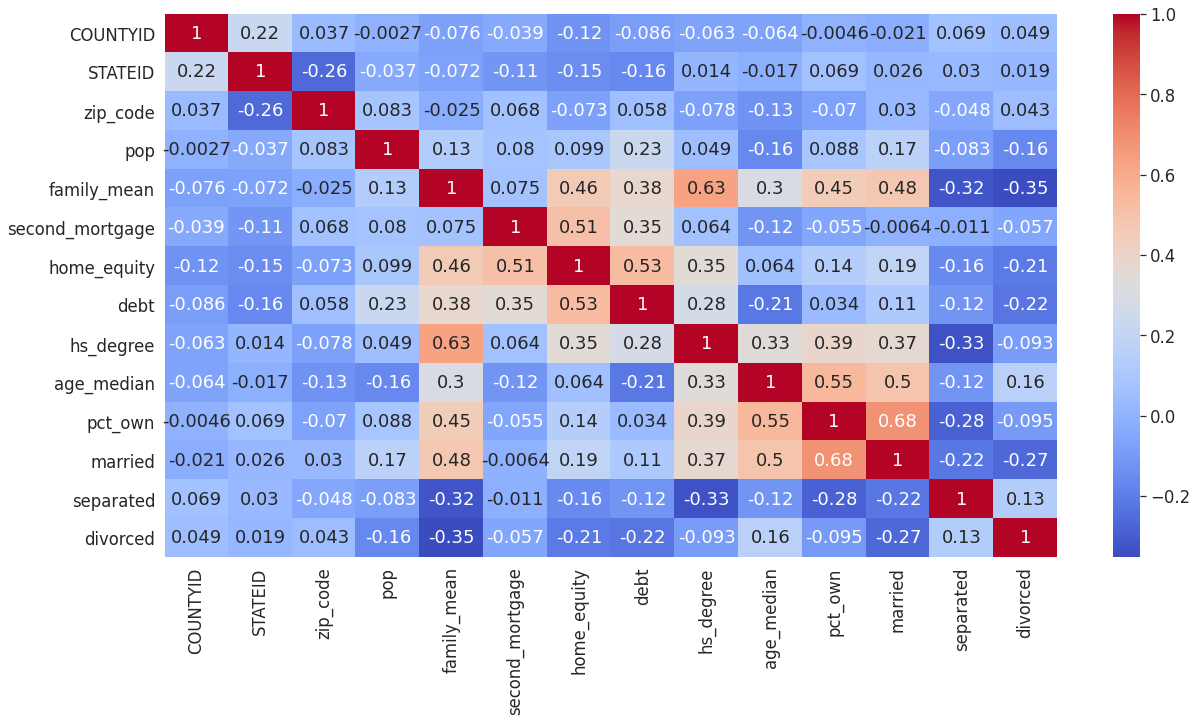

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

#Project Task: Week 3

##Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [125]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 3.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=2ec39f1f849be6608494c11f07c3a0495a7e2fc025d2c562d79aec80e1f957e3
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [126]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [127]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(train_DF.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-1.12589171e-01,  1.95646472e-02, -2.39331078e-02,
        -6.27632641e-02,  4.23474728e-02],
       [-1.10186766e-01,  1.33506223e-02,  2.79651261e-02,
        -1.49825870e-01,  1.10838809e-01],
       [-8.28678648e-02,  5.16372368e-02, -1.36451865e-01,
        -4.98918576e-02, -1.04024843e-01],
       [ 1.80961127e-02,  1.92013750e-02,  5.81329946e-03,
         2.64842758e-02, -6.12442838e-03],
       [ 9.02324744e-02, -9.72544305e-02, -6.54601348e-02,
        -1.33145904e-01, -1.48594602e-01],
       [-1.07335682e-02, -4.12376815e-02,  1.45853480e-01,
         8.80433059e-03,  1.08227568e-01],
       [-4.28796985e-02, -2.09780216e-02,  3.66726872e-02,
        -9.45597405e-02,  5.91380526e-02],
       [-2.44243072e-03, -1.53245408e-02, -2.68300798e-03,
        -4.52473034e-02,  2.37240644e-02],
       [ 7.92164309e-02,  9.57453339e-01, -8.71151616e-02,
        -6.59923658e-03, -3.97273266e-02],
       [ 7.39808174e-02,  9.18750534e-01, -1.08834838e-01,
        -2.79371571e-02

#Project Task: Week 4

##Data Modeling:

> Keep below considerations while building a linear regression model.

Data Modeling :
1. Variables should have significant impact on predicting Monthly mortgage and owner costs

2. Utilize all predictor variable to start with initial hypothesis

3. R square of 60 percent and above should be achieved

4. Ensure Multi-collinearity does not exist in dependent variables

5. Test if predicted variable is normally distributed

###1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. 
Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

In [128]:
train_DF.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [129]:
train_DF['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train_DF.replace(type_dict,inplace=True)

In [130]:
train_DF['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [131]:
test_DF.replace(type_dict,inplace=True)

In [132]:
test_DF['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [133]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [134]:
x_train=train_DF[feature_cols]
y_train=train_DF['hc_mortgage_mean']

In [135]:
x_test=test_DF[feature_cols]
y_test=test_DF['hc_mortgage_mean']

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [137]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [138]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

In [139]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
y_pred=linereg.predict(x_test_scaled)

In [141]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7348210754610929
Overall RMSE of linear regression model 323.1018894984635


In [142]:
#The Accuracy and R2 score are good, but still will investigate the model performance at state level

b) Run another model at State level. There are 52 states in USA.

In [143]:
state=train_DF['STATEID'].unique()
state
#Picking a few iDs 20,1,45,6

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [144]:
for i in [20,1,45]:
    print("State ID-",i)
    
    x_train_nation=train_DF[train_DF['COUNTYID']==i][feature_cols]
    y_train_nation=train_DF[train_DF['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation=test_DF[test_DF['COUNTYID']==i][feature_cols]
    y_test_nation=test_DF[test_DF['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.6046603766461813
Overall RMSE of linear regression model for state, 20 :- 307.97188999314704


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8104382475484617
Overall RMSE of linear regression model for state, 1 :- 307.8275861848434


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7887446497855253
Overall RMSE of linear regression model for state, 45 :- 225.69615420724125




In [145]:
# To check the residuals
residuals=y_test-y_pred
residuals

UID
255504    281.969088
252676    -69.935775
276314    190.761969
248614   -157.290627
286865     -9.887017
             ...    
238088    -67.541646
242811    -41.578757
250127   -127.427569
241096   -330.820475
287763    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <a list of 10 Patch objects>)

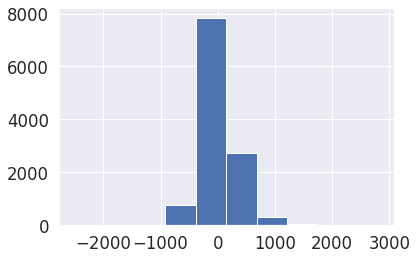

In [146]:
plt.hist(residuals) # Normal distribution of residuals

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



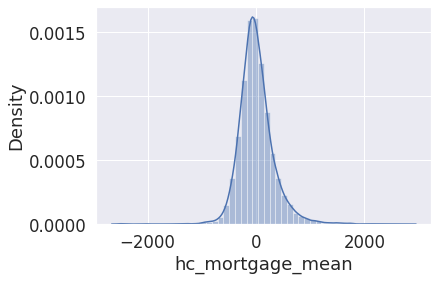

In [147]:
sns.distplot(residuals)

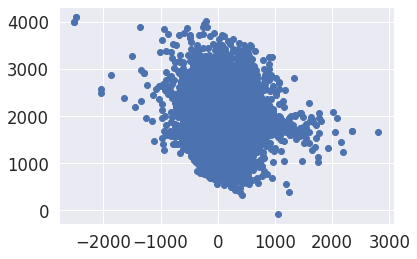

In [148]:
plt.scatter(residuals,y_pred) 
# Same variance and residuals does not have correlation with predictor
# Independance of residuals

##Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

b) Pie charts to show overall debt and bad debt.

c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

d) Heat map for correlation matrix.

e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

[Click Here To See DashBoard](https://public.tableau.com/profile/saurabh.zambare#!/vizhome/RealEstate_16057645309010/RealEstate?publish=yes)